In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [299]:
data_table = pd.DataFrame({'Peso': np.array([40.0, 93.5, 35.5, 30.0, 52.0, 17.0, 38.5,  8.5, 33.0,  9.5, 21.0, 79.0]) / 2.205,
                            'Altura': np.array([42.8, 63.5, 37.5, 39.5, 45.5, 38.5, 43.0, 22.5, 37.0, 23.5, 33.0, 58.0]) / 39.37,
                            'Cateter': [37, 50, 34, 36, 43, 28, 37, 20, 34, 30, 38, 47]},
                            dtype='float')

In [300]:
data_table

,Peso,Altura,Cateter
0,18.140590,1.087122,37.0
1,42.403628,1.612903,50.0
2,16.099773,0.952502,34.0
3,13.605442,1.003302,36.0
4,23.582766,1.155702,43.0
5,7.709751,0.977902,28.0
6,17.460317,1.092202,37.0
7,3.854875,0.571501,20.0
8,14.965986,0.939802,34.0
9,4.308390,0.596901,30.0


In [301]:
def normalization(matrix, vector):
    #Mean calculation
    mVector = np.mean(vector, axis=0)
    mMatrix = np.mean(matrix, axis=0)
    
    #Standard deviation
    stdVector = np.std(vector, axis = 0)
    stdMatrix = np.std(matrix, axis = 0)
     
    #Normalization of data
    vector = (vector - mVector)/stdVector
    matrix = (matrix - mMatrix)/stdMatrix
    
    return matrix, vector

In [302]:
#matrix_x = data_table[['Peso', 'Altura']].values
#vetor_y = data_table['Cateter'].values
matrix_x = np.array(data_table[['Peso', 'Altura']])
vetor_y = np.array(data_table['Cateter'])

In [303]:
matrix_x, vetor_y = normalization(matrix_x, vetor_y)

In [304]:
matrix_x = np.insert(matrix_x, 0, 1, axis =1)

In [80]:
def gradienteDescendente(matrix_x, vetor_y, epocas, alfa):
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    mse = []
    for epoca in range(epocas):
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            somatorio += (vetor_y[i] - y_chapeu[i]) * matrix_x[i]

        mse.append((-1/matrix_x.shape[0]) * somatorio)
        w_matrix = w_matrix + (alfa/matrix_x.shape[0])*somatorio
        y_chapeu = matrix_x.dot(w_matrix)

    return w_matrix, mse      

In [81]:
w, mse = gradienteDescendente(matrix_x, vetor_y, 10000, 0.001)

In [46]:
w

array([4.51733460e-05, 5.06796889e-01, 4.09680295e-01])

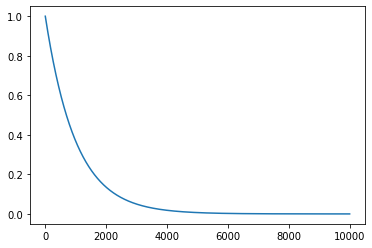

In [47]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [31]:
matrix_x

array([[ 1.        ,  0.07515517,  0.21366613],
       [ 1.        ,  2.21958262,  2.02508821],
       [ 1.        , -0.10521723, -0.25012793],
       [ 1.        , -0.32567239, -0.0751113 ],
       [ 1.        ,  0.55614824,  0.44993858],
       [ 1.        , -0.84674822, -0.16261962],
       [ 1.        ,  0.01503103,  0.23116779],
       [ 1.        , -1.18745165, -1.56275262],
       [ 1.        , -0.20542413, -0.29388208],
       [ 1.        , -1.14736889, -1.47524431],
       [ 1.        , -0.6864172 , -0.64391534],
       [ 1.        ,  1.63838266,  1.54379249]])

In [262]:
def gradiente_estocastico(matrix_x, vetor_y, epocas, alfa):
    w_matrix = np.ones((matrix_x.shape[1],), dtype=float)
    y_chapeu = matrix_x.dot(w_matrix)
    data =np.append(matrix_x, np.split(vetor_y, matrix_x.shape[0], axis=0), axis=1)
    mse = []

    for epoca in range(epocas):
        erro = 0
        somatorio = 0
        for i in range(matrix_x.shape[0]):
            w_matrix  = w_matrix + alfa * (vetor_y[i] - y_chapeu[i]) * matrix_x[i]
            somatorio += (vetor_y[i] - y_chapeu[i]) * matrix_x[i]
        
        mse.append((-1/matrix_x.shape[0]) * somatorio)        
        data = np.random.permutation(data)
        matrix_x = data[: ,0:3]
        vetor_y = data[:,3]
        
        y_chapeu = matrix_x.dot(w_matrix)  
    
    return w_matrix, mse
    

In [263]:
w, mse = gradiente_estocastico(matrix_x, vetor_y, 12000, 0.001)

In [264]:
w

array([3.63749829e-16, 6.08338901e-01, 3.08138280e-01])

In [265]:
mse

[array([1.        , 1.05658341, 1.06830631]),
 array([0.988     , 1.0315835 , 1.04330092]),
 array([0.976144  , 1.00717198, 1.01888393]),
 array([0.96443027, 0.983335  , 0.99504149]),
 array([0.95285711, 0.96005904, 0.97176006]),
 array([0.94142282, 0.93733091, 0.94902646]),
 array([0.93012575, 0.9151377 , 0.92682779]),
 array([0.91896424, 0.89346682, 0.90515146]),
 array([0.90793667, 0.872306  , 0.88398518]),
 array([0.89704143, 0.85164322, 0.86331695]),
 array([0.88627693, 0.83146676, 0.84313504]),
 array([0.87564161, 0.81176517, 0.82342801]),
 array([0.86513391, 0.7925273 , 0.80418468]),
 array([0.8547523 , 0.77374221, 0.78539415]),
 array([0.84449528, 0.75539925, 0.76704576]),
 array([0.83436133, 0.73748803, 0.74912909]),
 array([0.824349  , 0.71999837, 0.731634  ]),
 array([0.81445681, 0.70292037, 0.71455057]),
 array([0.80468333, 0.68624432, 0.69786909]),
 array([0.79502713, 0.66996078, 0.68158012]),
 array([0.7854868 , 0.6540605 , 0.66567442]),
 array([0.77606096, 0.63853447, 0.

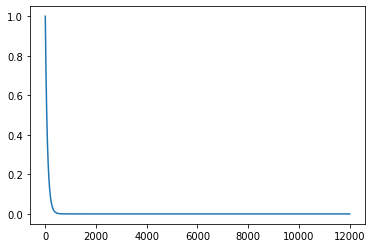

In [266]:
plt.plot(list(range(0, len(mse))), [item[0] for item in mse])
plt.show()

In [425]:
def regressao_analitica(matrix_x, vetor_y):
    a = np.linalg.inv(np.transpose(matrix_x).dot(matrix_x)).dot(np.transpose(matrix_x))
    w = np.linalg.inv(np.transpose(matrix_x).dot(matrix_x)).dot(np.transpose(matrix_x)).dot(vetor_y)
    #custo = 1/2 * ((np.linalg.inv(vetor_y - matrix_x.dot(w))).dot((vetor_y - matrix_x.dot(w)))) erro não sei porque
    y_chapeu = matrix_x.dot(w)

    custo = 1/2 * (np.transpose((vetor_y- y_chapeu)).dot((vetor_y -y_chapeu)))
    return w, custo

In [426]:
w, c= regressao_analitica(matrix_x, vetor_y)

In [427]:
print(w)

[3.74700271e-16 6.08893878e-01 3.07583303e-01]


In [428]:
print(c)

1.0478566570309575
